In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import openturns as ot
import matplotlib.pyplot as plt
ot.RandomGenerator.SetSeed(2)

In [3]:
from matplotlib import rc
rc('font', **{'family': 'Libertine'})
rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=16)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size

In [4]:
#marginals = [ot.Normal(1., 2.), ot.Normal(1., 2.)]
marginals = [ot.Exponential(1.), ot.Exponential(1.)]
# Copulas 
correlation = ot.CorrelationMatrix(2)
correlation[1, 0] = 0.8
normal_copula= ot.NormalCopula(correlation)
clayton_copula = ot.ClaytonCopula(2.5)
# Distributions 
independent_distribution = ot.ComposedDistribution(marginals)
normal_distribution = ot.ComposedDistribution(marginals, normal_copula)
clayton_distribution = ot.ComposedDistribution(marginals, clayton_copula)

In [5]:
N = int(1e4)
cols = ["$x_1$", "$x_2$"]
df_independent = pd.DataFrame(np.array(independent_distribution.getSample(N)), columns=cols)
df_normal = pd.DataFrame(np.array(normal_distribution.getSample(N)), columns=cols)
df_clayton = pd.DataFrame(np.array(clayton_distribution.getSample(N)), columns=cols)

In [6]:
def joint_plot(df, alpha, color, xticks=None, yticks=None):
    g = sns.jointplot(data=df, x="$x_1$", y="$x_2$", height=4, marginal_ticks=False, 
                         marginal_kws=dict(bins=20, stat="probability", alpha=alpha), 
                         marker=".", alpha=alpha, color=color,
                         )
    if xticks is not None:
        g.ax_joint.set_xticks(xticks)
        g.ax_joint.set_yticks(yticks)
    return g
def empirical_copula_plot(df, alpha, color, xticks=None, yticks=None):
    g = sns.jointplot(data=df, x="$x_1$", y="$x_2$", height=4, marginal_ticks=False, 
                         marginal_kws=dict(bins=10, stat="probability", alpha=alpha), 
                         joint_kws=dict(bins=10),
                         alpha=alpha, color=color,
                         kind="hist"
                         )
    if xticks is not None:
        g.ax_joint.set_xticks(xticks)
        g.ax_joint.set_yticks(yticks)
    return g

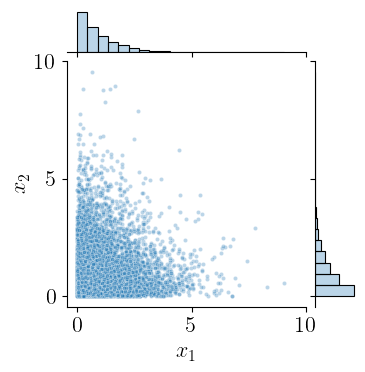

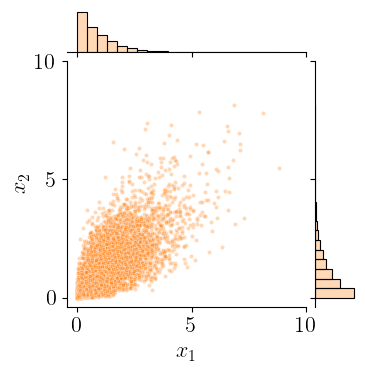

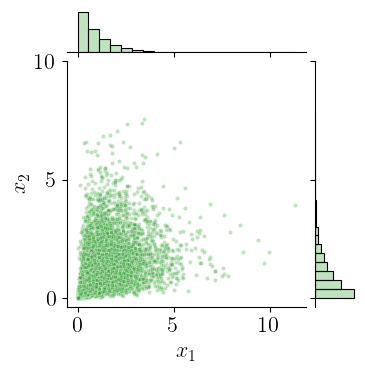

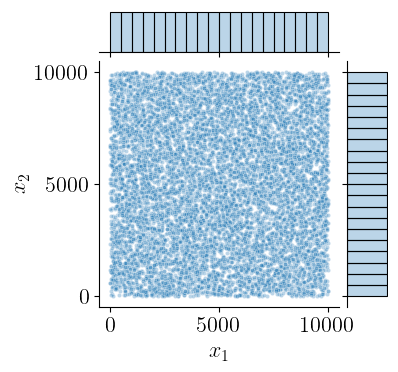

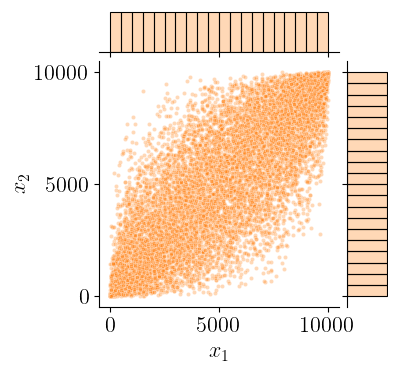

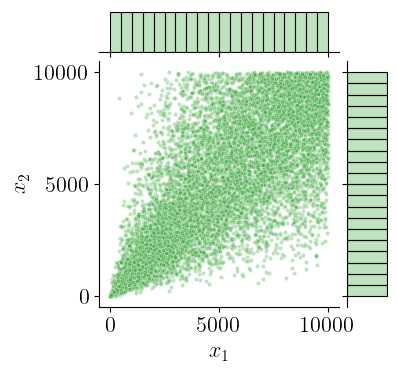

In [7]:
alpha = 0.3
# Joints plots in physical space
joint_plot(df_independent, alpha, "C0", xticks=[0, 5, 10], yticks=[0, 5, 10])
plt.savefig("figures/independent_copula.png", dpi=300, bbox_inches='tight')
joint_plot(df_normal, alpha, "C1", xticks=[0, 5, 10], yticks=[0, 5, 10])
plt.savefig("figures/normal_copula.png", dpi=300, bbox_inches='tight')
joint_plot(df_clayton, alpha, "C2", xticks=[0, 5, 10], yticks=[0, 5, 10])
plt.savefig("figures/clayton_copula.png", dpi=300, bbox_inches='tight')
# Joints plots in ranked space
joint_plot(df_independent.rank(), alpha, "C0", xticks=[0, N/2, N], yticks=[0, N/2, N])
plt.savefig("figures/independent_copula_ranked.png", dpi=300, bbox_inches='tight')
joint_plot(df_normal.rank(), alpha, "C1", xticks=[0, N/2, N], yticks=[0, N/2, N])
plt.savefig("figures/normal_copula_ranked.png", dpi=300, bbox_inches='tight')
joint_plot(df_clayton.rank(), alpha, "C2", xticks=[0, N/2, N], yticks=[0, N/2, N])
plt.savefig("figures/clayton_copula_ranked.png", dpi=300, bbox_inches='tight')
# 2D Histograms in ranked space: empirical copula
#empirical_copula_plot(df_clayton.rank(), alpha, "C0", xticks=[0, N/2, N], yticks=[0, N/2, N])